In [144]:
import pylab
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.interpolate import UnivariateSpline

In [145]:
def read_txt_dyn_sp_file(filename):
    file = open(filename, 'r')
    param = []
    for line in file:
        num = line.rstrip().split()
        floatnum = [float(i) for i in num]
        param.append(floatnum)
    file.close()
    return np.array((param))

In [146]:
dyn_sp_gurt_a = read_txt_dyn_sp_file('DATA_tmp/A200604_105919.adr_12-26-30 - 12-27-30_chA.txt')
dyn_sp_gurt_b = read_txt_dyn_sp_file('DATA_tmp/A200604_105919.adr_12-26-30 - 12-27-30_chB.txt')
dyn_sp_utr2_a = read_txt_dyn_sp_file('DATA_tmp/D040620_120328.jds_12-26-30 - 12-27-30_chA.txt')
dyn_sp_utr2_b = read_txt_dyn_sp_file('DATA_tmp/D040620_120328.jds_12-26-30 - 12-27-30_chB.txt')

print ('  Shape of the array GURT ch A: ', dyn_sp_gurt_a.shape)
print ('  Shape of the array GURT ch B: ', dyn_sp_gurt_b.shape)
print ('  Shape of the array UTR2 ch A: ', dyn_sp_utr2_a.shape)
print ('  Shape of the array UTR2 ch B: ', dyn_sp_utr2_b.shape)

  Shape of the array GURT ch A:  (2048, 600)
  Shape of the array GURT ch B:  (2048, 600)
  Shape of the array UTR2 ch A:  (6144, 600)
  Shape of the array UTR2 ch B:  (6144, 600)


In [147]:
t_resolution = 0.1                                                         # Seconds

f_min_gurt = 0.038                                                         # MHz
f_max_gurt = 78.125                                                        # MHz
n_channels_gurt = 2048
frequency_gurt = np.linspace(f_min_gurt, f_max_gurt, n_channels_gurt)      # MHz

f_min_utr2 = 8.0                                                           # MHz
f_max_utr2 = 33.0                                                          # MHz
n_channels_utr2 = 6144
frequency_utr2 = np.linspace(f_min_utr2, f_max_utr2, n_channels_utr2)      # MHz

f_resolution_gurt = ((f_max_gurt - f_min_gurt) / n_channels_gurt) * 1000000
f_resolution_utr2 = ((f_max_utr2 - f_min_utr2) / n_channels_utr2) * 1000000

print(' Frequency resolution GURT: ', f_resolution_gurt / 1000, ' kHz.')
print(' Frequency resolution UTR2: ', f_resolution_utr2 / 1000, ' kHz.')

print('      Time resolution: ', t_resolution, ' s.')

 Frequency resolution GURT:  38.12841796875  kHz.
 Frequency resolution UTR2:  4.069010416666667  kHz.
      Time resolution:  0.1  s.


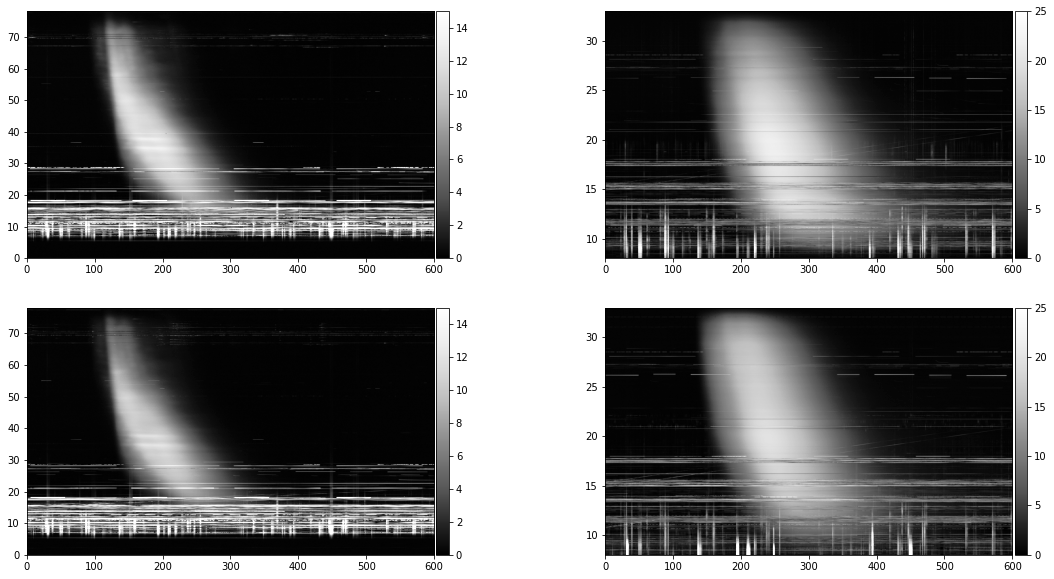

In [148]:
v_min = 0; v_max = 15;

fig = plt.figure(figsize=(19.0, 10.0));
ax1 = fig.add_subplot(221);
im0 = ax1.imshow(np.flipud(dyn_sp_gurt_a), aspect='auto', vmin=v_min, vmax=v_max, cmap='Greys_r', \
                  extent=[0, dyn_sp_gurt_a.shape[1], 0, f_max_gurt]);
cbar = fig.colorbar(im0, ax=ax1, pad=0.005);

ax2 = fig.add_subplot(222);
im0 = ax2.imshow(np.flipud(dyn_sp_utr2_a), aspect='auto', vmin=v_min, vmax=25, cmap='Greys_r', \
                  extent=[0, dyn_sp_utr2_a.shape[1], f_min_utr2, f_max_utr2]);
cbar = fig.colorbar(im0, ax=ax2, pad=0.005);

ax3 = fig.add_subplot(223);
im0 = ax3.imshow(np.flipud(dyn_sp_gurt_b), aspect='auto', vmin=v_min, vmax=v_max, cmap='Greys_r', \
                  extent=[0, dyn_sp_gurt_a.shape[1], 0, f_max_gurt]);
cbar = fig.colorbar(im0, ax=ax3, pad=0.005);

ax4 = fig.add_subplot(224);
im0 = ax4.imshow(np.flipud(dyn_sp_utr2_b), aspect='auto', vmin=v_min, vmax=25, cmap='Greys_r', \
                  extent=[0, dyn_sp_utr2_a.shape[1], f_min_utr2, f_max_utr2]);
cbar = fig.colorbar(im0, ax=ax4, pad=0.005);

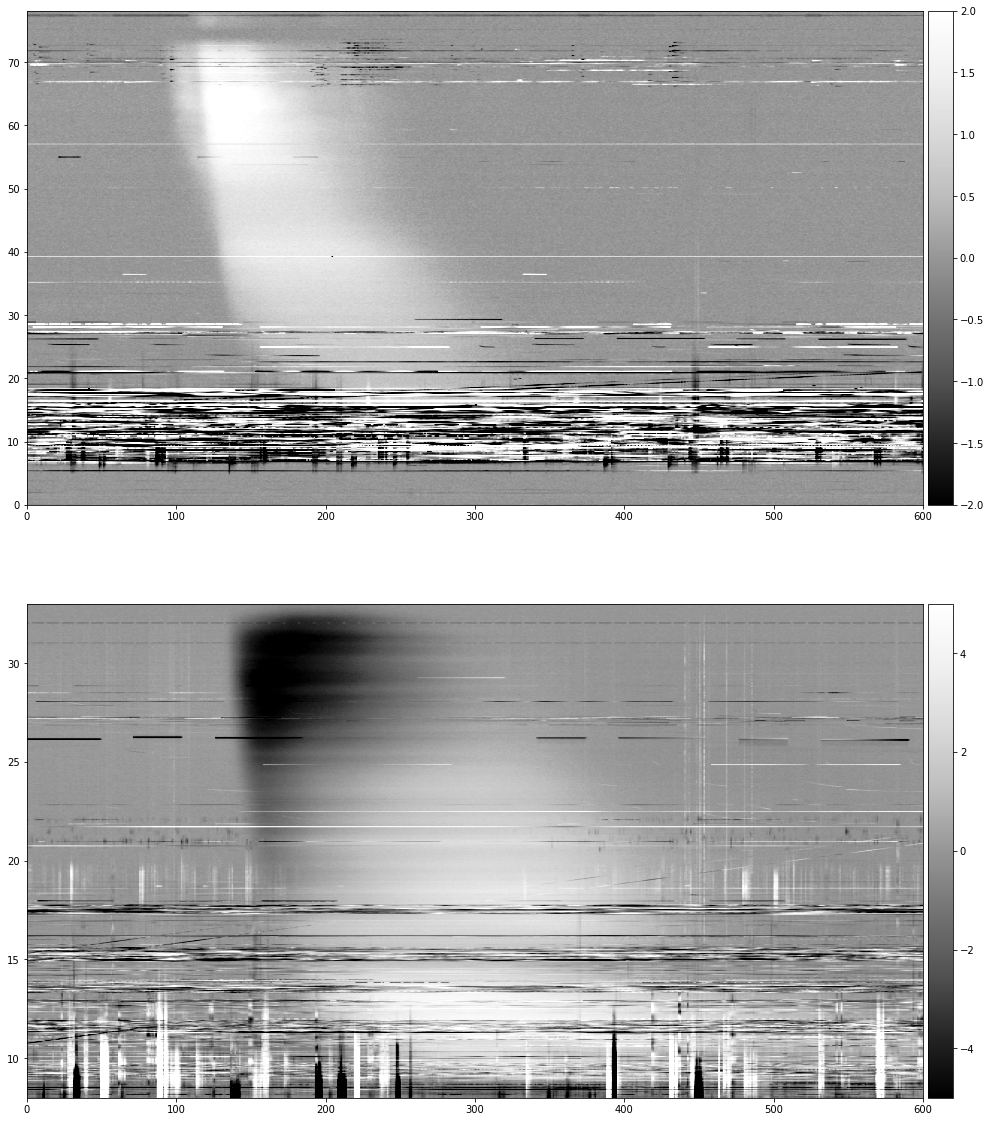

In [149]:
fig = plt.figure(figsize=(19.0, 20.0));
ax1 = fig.add_subplot(211);
im0 = ax1.imshow(np.flipud(dyn_sp_gurt_a - dyn_sp_gurt_b), aspect='auto', vmin=-2, vmax=2, cmap='Greys_r', \
                  extent=[0, dyn_sp_gurt_a.shape[1], 0, f_max_gurt]);
cbar = fig.colorbar(im0, ax=ax1, pad=0.005);

ax2 = fig.add_subplot(212);
im0 = ax2.imshow(np.flipud(dyn_sp_utr2_a - dyn_sp_utr2_b), aspect='auto', vmin=-5, vmax=5, cmap='Greys_r', \
                  extent=[0, dyn_sp_utr2_a.shape[1], f_min_utr2, f_max_utr2]);
cbar = fig.colorbar(im0, ax=ax2, pad=0.005);

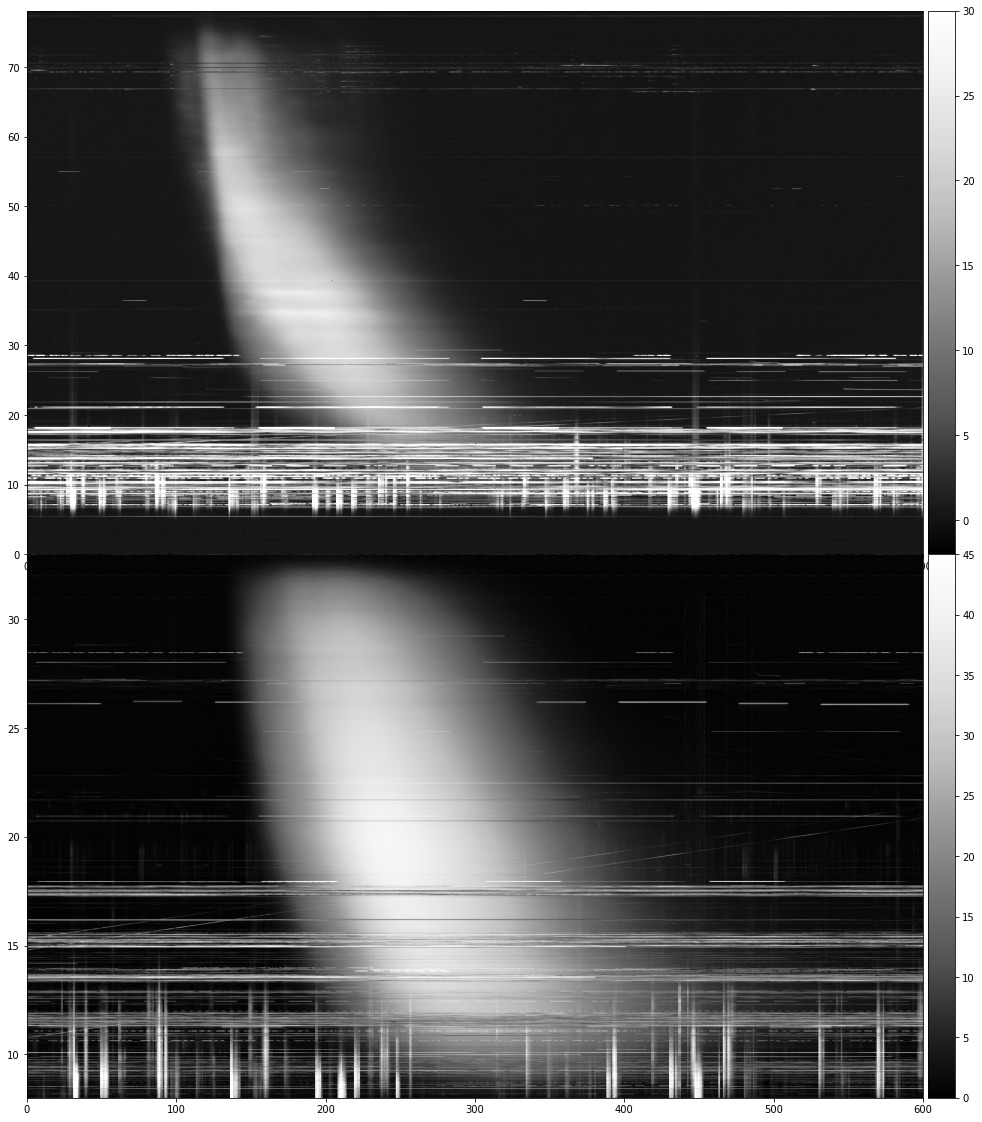

In [165]:
fig = plt.figure(figsize=(19.0, 20.0));
fig.subplots_adjust(hspace=0.00, wspace=0.00)
ax1 = fig.add_subplot(211);
im0 = ax1.imshow(np.flipud(dyn_sp_gurt_a + dyn_sp_gurt_b), aspect='auto', vmin=-2, vmax=30, cmap='Greys_r', \
                  extent=[0, dyn_sp_gurt_a.shape[1], 0, f_max_gurt]);
cbar = fig.colorbar(im0, ax=ax1, pad=0.005);

ax2 = fig.add_subplot(212);
im0 = ax2.imshow(np.flipud(dyn_sp_utr2_a + dyn_sp_utr2_b), aspect='auto', vmin=-0, vmax=45, cmap='Greys_r', \
                  extent=[0, dyn_sp_utr2_a.shape[1], f_min_utr2, f_max_utr2]);
cbar = fig.colorbar(im0, ax=ax2, pad=0.005);

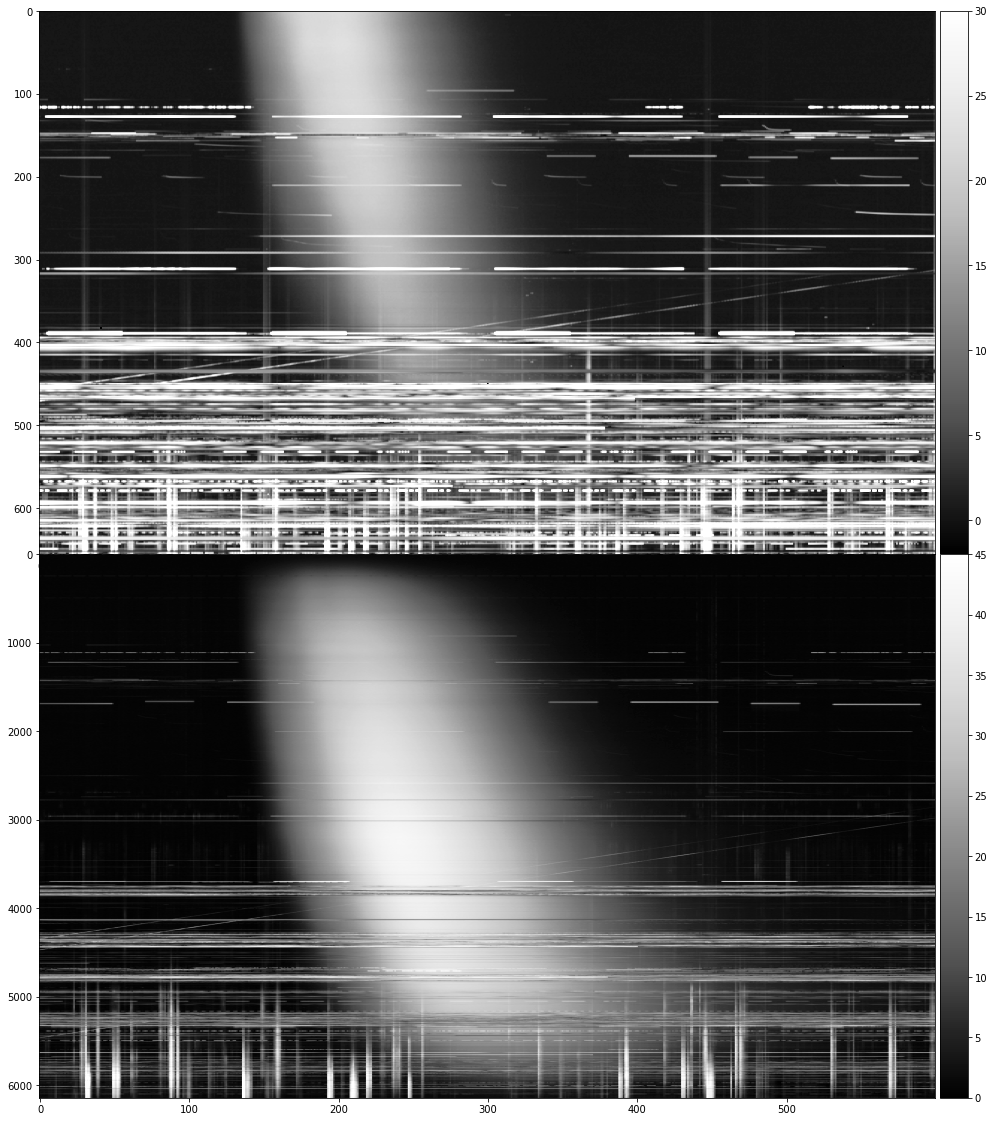

In [188]:
sum_gurt = dyn_sp_gurt_a + dyn_sp_gurt_b
sum_utr2 = dyn_sp_utr2_a + dyn_sp_utr2_b

sum_gurt = sum_gurt[209:865]

fig = plt.figure(figsize=(19.0, 20.0));
fig.subplots_adjust(hspace=0.00, wspace=0.00)
ax1 = fig.add_subplot(211);
im0 = ax1.imshow(np.flipud(sum_gurt), aspect='auto', vmin=-2, vmax=30, cmap='Greys_r');
cbar = fig.colorbar(im0, ax=ax1, pad=0.005);

ax2 = fig.add_subplot(212);
im0 = ax2.imshow(np.flipud(sum_utr2), aspect='auto', vmin=-0, vmax=45, cmap='Greys_r');
cbar = fig.colorbar(im0, ax=ax2, pad=0.005);

UTR2 high frequency =  28.002441803678984  MHz
GURT low frequency =   27.999783585735223  MHz
GURT high frequency =  47.98883488031265  MHz


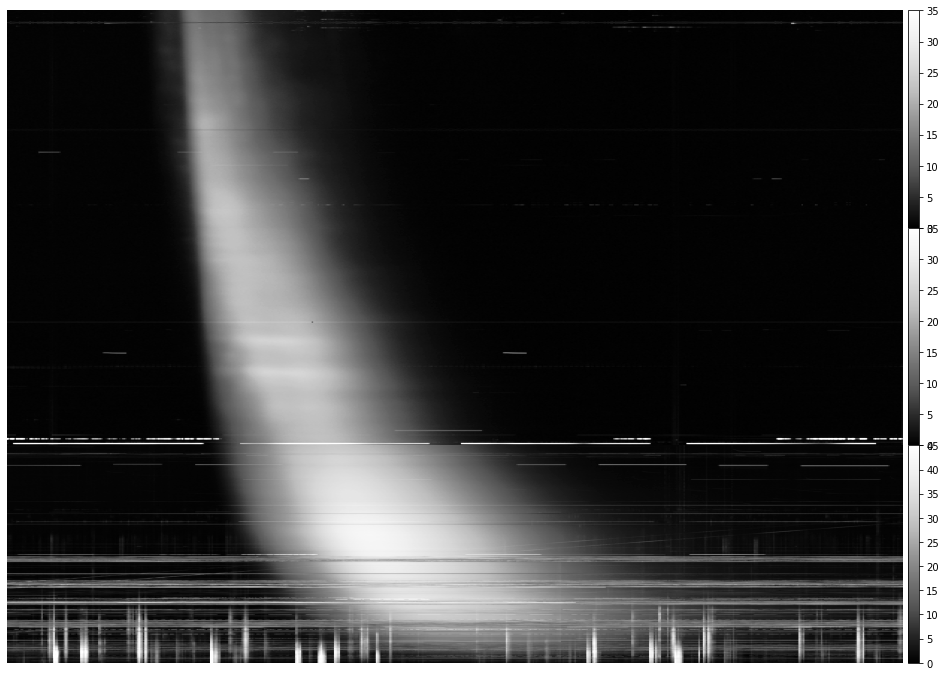

In [164]:
sum_gurt = dyn_sp_gurt_a + dyn_sp_gurt_b
sum_utr2 = dyn_sp_utr2_a + dyn_sp_utr2_b

utr_hc = 4915
gurt_hc = 1257
gurt_lc = 733
gurt_uhc = 1782

sum_gurt_h = sum_gurt[gurt_hc:gurt_uhc]
sum_gurt = sum_gurt[gurt_lc:gurt_hc]    # 28 - 48 MHz        # GURT: 786 = 30 MHz, 1572 = 60 MHz, 1441 = 55 MHz
sum_utr2 = sum_utr2[:utr_hc]            #  8 - 28 MHz        # UTR2: 5406 = 30 MHz

print('UTR2 high frequency = ', frequency_utr2[utr_hc], ' MHz')
print('GURT low frequency =  ', frequency_gurt[gurt_lc], ' MHz')
print('GURT high frequency = ', frequency_gurt[gurt_hc], ' MHz')

fig = plt.figure(figsize=(19.0, 12.0));
fig.subplots_adjust(hspace=0.00, wspace=0.00)
ax0 = fig.add_subplot(311);
im0 = ax0.imshow(np.flipud(sum_gurt_h), aspect='auto', vmin=0, vmax=35, cmap='Greys_r');  #32
cbar = fig.colorbar(im0, ax=ax0, pad=0.005);
ax0.axis('off');
ax1 = fig.add_subplot(312);
im1 = ax1.imshow(np.flipud(sum_gurt), aspect='auto', vmin=0, vmax=35, cmap='Greys_r');  #32
cbar = fig.colorbar(im1, ax=ax1, pad=0.005);
ax1.axis('off');
ax2 = fig.add_subplot(313);
im2 = ax2.imshow(np.flipud(sum_utr2), aspect='auto', vmin=0, vmax=45, cmap='Greys_r');
cbar = fig.colorbar(im2, ax=ax2, pad=0.005);
ax2.axis('off');

In [186]:
frequency_gurt[865]

33.03519345383488